In [83]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

cross-sectional data: each data point represents different individual

time-series:each data represents data point at time



In [94]:
df = pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/occupancy.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [5]:
df['date']

0        2/2/2015 14:00
1        2/2/2015 15:00
2        2/2/2015 16:00
3        2/2/2015 17:00
4        2/2/2015 18:00
             ...       
2659     5/24/2015 9:00
2660    5/24/2015 10:00
2661    5/24/2015 11:00
2662    5/24/2015 12:00
2663    5/24/2015 13:00
Name: date, Length: 2664, dtype: object

### Declaring the date variable as a datetime object

In [100]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0      2015-02-02 14:00:00
1      2015-02-02 15:00:00
2      2015-02-02 16:00:00
3      2015-02-02 17:00:00
4      2015-02-02 18:00:00
               ...        
2659   2015-05-24 09:00:00
2660   2015-05-24 10:00:00
2661   2015-05-24 11:00:00
2662   2015-05-24 12:00:00
2663   2015-05-24 13:00:00
Name: date, Length: 2664, dtype: datetime64[ns]

In [101]:
print(pd.to_datetime("4th of July, 2015"))
print(pd.to_datetime("Nov 9 2001"))
print(pd.to_datetime("February 2nd 2019 15:32"))

2015-07-04 00:00:00
2001-11-09 00:00:00
2019-02-02 15:32:00


Formatting options for datetime objects: https://strftime.org/

In [102]:
print(pd.to_datetime("February 2nd 2019 15:32").strftime('%B')) #only month
print(pd.to_datetime("February 2nd 2019 15:32").strftime('%c')) #locale`s appropriate date and time representation

February
Sat Feb  2 15:32:00 2019


### Setting a time index

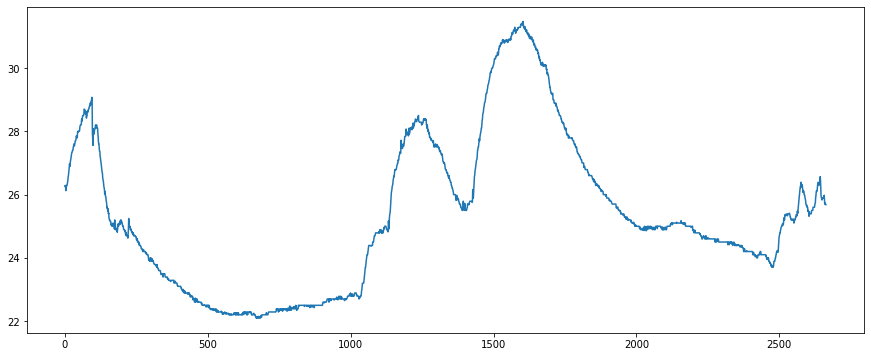

In [103]:
# Without the date index
# resizing all of the plots: 
# plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(df['Humidity'])

In [104]:
df.index = pd.DatetimeIndex(df['date'], freq='H') #defining date as index and our data is hourly
df.index

DatetimeIndex(['2015-02-02 14:00:00', '2015-02-02 15:00:00',
               '2015-02-02 16:00:00', '2015-02-02 17:00:00',
               '2015-02-02 18:00:00', '2015-02-02 19:00:00',
               '2015-02-02 20:00:00', '2015-02-02 21:00:00',
               '2015-02-02 22:00:00', '2015-02-02 23:00:00',
               ...
               '2015-05-24 04:00:00', '2015-05-24 05:00:00',
               '2015-05-24 06:00:00', '2015-05-24 07:00:00',
               '2015-05-24 08:00:00', '2015-05-24 09:00:00',
               '2015-05-24 10:00:00', '2015-05-24 11:00:00',
               '2015-05-24 12:00:00', '2015-05-24 13:00:00'],
              dtype='datetime64[ns]', name='date', length=2664, freq='H')

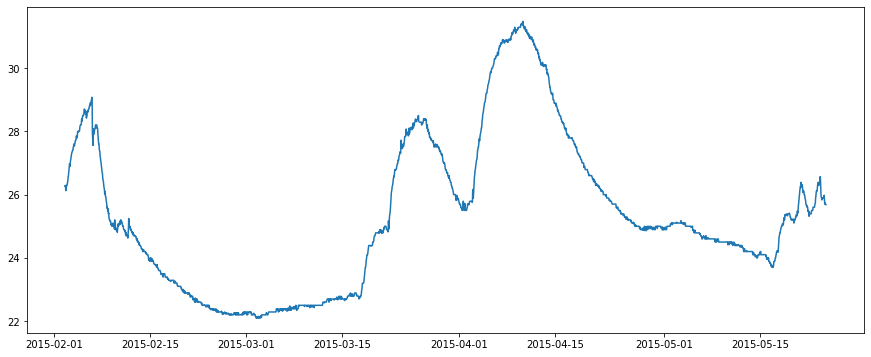

In [105]:
plt.rcParams["figure.figsize"] = (15,6) #default figsize index for the rest of the plots
plt.plot(df['Humidity'])
plt.show()
#datetime yaptigin icin 15 günlük aralar ile gösteriyor eger object olsaydi categorical variable olarak görebilirdi

### Changing the frequency of the data (Resampling)

In [22]:
df["Humidity"][:154].mean()

27.529600958376623

In [106]:
df['Humidity'].resample('D').mean() #there has to be datetime index
#df['Humidity'].resample('W').agg(["mean","median"]) #does it work with null data?

date
2015-02-02    26.269700
2015-02-03    27.136375
2015-02-04    27.938137
2015-02-05    28.545312
2015-02-06    28.470931
                ...    
2015-05-20    25.684042
2015-05-21    25.902774
2015-05-22    25.495139
2015-05-23    26.171085
2015-05-24    25.825214
Freq: D, Name: Humidity, Length: 112, dtype: float64

In [62]:
df["Humidity"]

date
2015-02-02 16:00:00    26.230000
2015-02-02 17:00:00    26.125000
2015-02-02 18:00:00    26.200000
2015-02-02 19:00:00    26.260000
2015-02-02 20:00:00    26.290000
                         ...    
2015-05-24 09:00:00    25.700000
2015-05-24 10:00:00    25.736000
2015-05-24 11:00:00    25.700000
2015-05-24 12:00:00    25.700000
2015-05-24 13:00:00    25.681667
Freq: H, Name: Humidity, Length: 2662, dtype: float64

In [107]:
a = np.nan

In [108]:
df["Humidity"].isnull().sum()

0

In [42]:
#26.26

AttributeError: 'float' object has no attribute 'isnan'

In [111]:
help(df.resample)

Help on method resample in module pandas.core.generic:

resample(rule, axis=0, closed: Union[str, NoneType] = None, label: Union[str, NoneType] = None, convention: str = 'start', kind: Union[str, NoneType] = None, loffset=None, base: int = 0, on=None, level=None) method of pandas.core.frame.DataFrame instance
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time
    series. Object must have a datetime-like index (`DatetimeIndex`,
    `PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
    to the `on` or `level` keyword.
    
    Parameters
    ----------
    rule : DateOffset, Timedelta or str
        The offset string or object representing target conversion.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Which axis to use for up- or down-sampling. For `Series` this
        will default to 0, i.e. along the rows. Must be
        `DatetimeIndex`, `TimedeltaIndex` or `PeriodIndex`.
    closed : {'right', 'l

Options for resampling frequency:
    
- B       business day frequency
- C       custom business day frequency (experimental)
- D       calendar day frequency
- W       weekly frequency
- M       month end frequency
- SM      semi-month end frequency (15th and end of month)
- Q       quarter end frequency
- A       year end frequency
- H       hourly frequency
- T       minutely frequency
- S       secondly frequency
- L       milliseonds
- U       microseconds
- N       nanoseconds
- and more!

In [109]:
df['Humidity'].resample('M').mean()

date
2015-02-28    24.374582
2015-03-31    24.325819
2015-04-30    27.677441
2015-05-31    24.842351
Freq: M, Name: Humidity, dtype: float64

## First Differencing your data

In [110]:
df['Humidity_diff'] = df['Humidity'].diff() #bir önceki entryden ne kadar degistigini gösterir df["humidity"][x] - df["humidity"][x-1]
print(df)
df.dropna(inplace = True)

                                   date  Temperature   Humidity       Light  \
date                                                                          
2015-02-02 14:00:00 2015-02-02 14:00:00    23.700000  26.272000  585.200000   
2015-02-02 15:00:00 2015-02-02 15:00:00    23.718000  26.290000  578.400000   
2015-02-02 16:00:00 2015-02-02 16:00:00    23.730000  26.230000  572.666667   
2015-02-02 17:00:00 2015-02-02 17:00:00    23.722500  26.125000  493.750000   
2015-02-02 18:00:00 2015-02-02 18:00:00    23.754000  26.200000  488.600000   
...                                 ...          ...        ...         ...   
2015-05-24 09:00:00 2015-05-24 09:00:00    24.290000  25.700000  808.000000   
2015-05-24 10:00:00 2015-05-24 10:00:00    24.330000  25.736000  809.800000   
2015-05-24 11:00:00 2015-05-24 11:00:00    24.330000  25.700000  817.000000   
2015-05-24 12:00:00 2015-05-24 12:00:00    24.356667  25.700000  813.000000   
2015-05-24 13:00:00 2015-05-24 13:00:00    24.408333

## Decomposing Time Series data

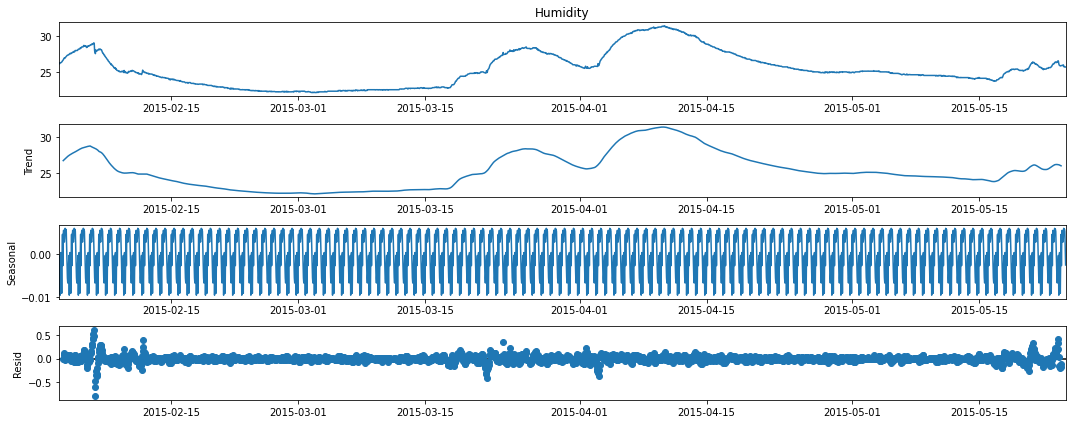

In [111]:
dec = sm.tsa.seasonal_decompose(df['Humidity'])
#residual:unexplained variation (surprise)
#seasonal:help you adjust seasonal, seasonality is daily for instance here nem durumu
#trend:business doing now then the last year,comparing may2020 to may19, taking out seasonal effect observing the business
#predicted value: trend+seasonality
dec.plot()
plt.show()

## Checking for autocorrelation

In [112]:
df['Humidity'].autocorr() #the correlation of time series as time t with itself at time t-1
# between -1 and 1, autocorr 0.9 timeseries value todays influence the other one positively or incrementality artan bir sekilde

#lag1: t and t-1
#lag2: t and t-2

0.9997365636761234

In [48]:
help(pd.Series.autocorr)

Help on function autocorr in module pandas.core.series:

autocorr(self, lag=1) -> float
    Compute the lag-N autocorrelation.
    
    This method computes the Pearson correlation between
    the Series and its shifted self.
    
    Parameters
    ----------
    lag : int, default 1
        Number of lags to apply before performing autocorrelation.
    
    Returns
    -------
    float
        The Pearson correlation between self and self.shift(lag).
    
    See Also
    --------
    Series.corr : Compute the correlation between two Series.
    Series.shift : Shift index by desired number of periods.
    DataFrame.corr : Compute pairwise correlation of columns.
    DataFrame.corrwith : Compute pairwise correlation between rows or
        columns of two DataFrame objects.
    
    Notes
    -----
    If the Pearson correlation is not well defined return 'NaN'.
    
    Examples
    --------
    >>> s = pd.Series([0.25, 0.5, 0.2, -0.05])
    >>> s.autocorr()  # doctest: +ELLIPSIS
   

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

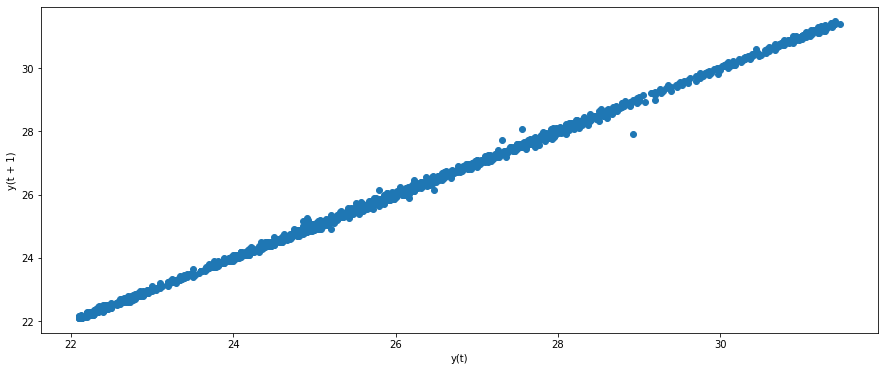

In [113]:
from pandas.plotting import lag_plot
lag_plot(df['Humidity'])

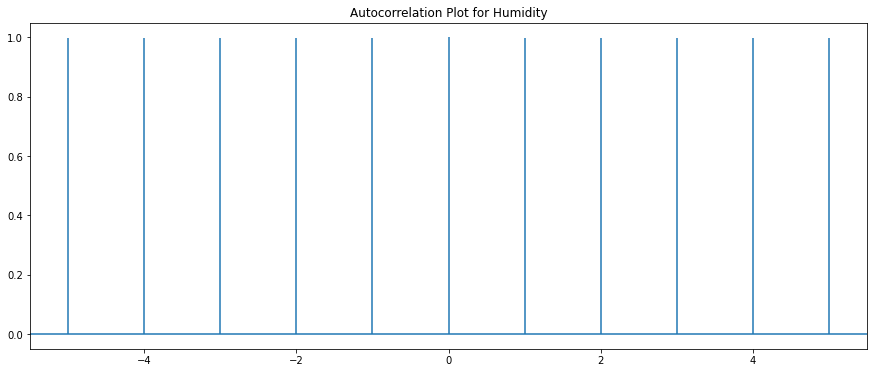

In [52]:
# Autocorrelation Plot

plt.acorr(df['Humidity'], maxlags = 5)
#lag0: means correlation of x_t and x_t so it is 1
#heatmap of autocorrelation
plt.title("Autocorrelation Plot for Humidity")

#the autocorrelation is very high regardless of t here, it is easy to forecast because of the correlation between today and yesterday
  
plt.show()  

## Applying Time Series models

In [115]:
#yt-1 ile yt yi tahmin edebiliriz
#yt ile yt+1 i tahmin edebiliriz
# bunu yapmamizin amacida prediction yapmak
#AR1-lags1
#AR2-lags2
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df['Humidity'], lags = 1).fit() #lags arttikca prediction gücü azalacaktir. lags=10 yaptiginda p value cok cikacak mesela, insignificant olacak
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2663
Model:                     AutoReg(1)   Log Likelihood                3898.689
Method:               Conditional MLE   S.D. of innovations              0.056
Date:                Sat, 26 Dec 2020   AIC                             -5.765
Time:                        14:55:15   BIC                             -5.758
Sample:                    02-02-2015   HQIC                            -5.762
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0071      0.011      0.624      0.533      -0.015       0.029
Humidity.L1     0.9997      0.000   2247.322      0.000       0.999       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
-----------------------------------------------------------------------------
"""

In [119]:
help(AutoReg)

Help on class AutoReg in module statsmodels.tsa.ar_model:

class AutoReg(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  AutoReg(endog, lags, trend='c', seasonal=False, exog=None, hold_back=None, period=None, missing='none')
 |  
 |  Autoregressive AR-X(p) model.
 |  
 |  Estimate an AR-X model using Conditional Maximum Likelihood (OLS).
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The independent variable.
 |  lags : {int, list[int]}
 |      The number of lags to include in the model if an integer or the
 |      list of lag indices to include.  For example, [1, 4] will only
 |      include lags 1 and 4 while lags=4 will include lags 1, 2, 3, and 4.
 |  trend : {'n', 'c', 't', 'ct'}
 |      The trend to include in the model:
 |  
 |      * 'n' - No trend.
 |      * 'c' - Constant only.
 |      * 't' - Time trend only.
 |      * 'ct' - Constant and time trend.
 |  
 |  seasonal : bool
 |      Flag indicating whether to include

## Making Predictions

In order to assess the accuracy of our predictions, we will remove the last ten observations from the variable which we are using to train the model. Afterwards, we will then predict those ten observations, and see how close we got with our model to what happened in reality!

In [71]:
(train, test) = df.Humidity[:-10], df.Humidity[-10:] #train: humidity son 10 entrysi disindaki series
#test:son 10 deger humiditydeki

#random yapamazsin cünkü time series bir consistency olmali
model = AutoReg(train, lags = 2).fit()
model.summary()

C:\Users\cnr\.conda\envs\kittycat\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2652
Model:                     AutoReg(2)   Log Likelihood                3884.695
Method:               Conditional MLE   S.D. of innovations              0.056
Date:                Thu, 26 Nov 2020   AIC                             -5.767
Time:                        18:45:01   BIC                             -5.758
Sample:                    02-02-2015   HQIC                            -5.763
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0069      0.011      0.605      0.545      -0.015       0.029
Humidity.L1     1.0090      0.019     51.976      0.000       0.971       1.047
Humidity.L2    -0.0092      0.019     -0.476      0.634      -0.047       0.029
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
AR.2          108.1830           +0.0000j          108.1830            0.0000
-----------------------------------------------------------------------------
"""

In [80]:
#son 10 degeri cikariyoruz onlar test degerleri cünkü en son degerler yani yarinki yada bir kac saat sonraki degerler


2662

In [81]:
pred #bunu yaparken lags cok kücük oldugunda hep bir gün geriden geliyor, yani 1 gün öncekine göre predict ediyor
# bu yüzden cok uzun predictionlar yapamayabilirsin

2015-05-24 04:00:00    25.889684
2015-05-24 05:00:00    25.889684
2015-05-24 06:00:00    25.911878
2015-05-24 07:00:00    25.891165
2015-05-24 08:00:00    25.978445
2015-05-24 09:00:00    25.850549
2015-05-24 10:00:00    25.698355
2015-05-24 11:00:00    25.736055
2015-05-24 12:00:00    25.699410
2015-05-24 13:00:00    25.699737
2015-05-24 14:00:00    25.681242
Freq: H, dtype: float64

In [68]:
pred = model.predict(start=len(train), end=len(train)+10)
#model is quite easy to predict, beccause autocorr was so high
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})
# predict:Y hat =beta0 + beta1 Yt-1 + beta2 Yt-2

,Prediction,True Values
0,25.890000,25.889684
1,25.912000,25.889684
2,25.891667,25.911878
3,25.978000,25.891165
4,25.852000,25.978445
5,25.700000,25.850549
6,25.736000,25.698355
7,25.700000,25.736055
8,25.700000,25.699410
9,25.681667,25.699737


### Dickey Fuller Test for Stationarity

In [92]:
from statsmodels.tsa.stattools import adfuller
#help(adfuller)
adfuller(df.Humidity)#second one is p-value 0.22, we fail to reject it is not stationary because it is bigger than 0.5
#HO: time series is not stationary, we fail to reject so the data is not stationary

(-2.149550993079104,
 0.2250619992320207,
 23,
 2638,
 {'1%': -3.4328313019591583,
  '5%': -2.86263625123482,
  '10%': -2.567353572714873},
 -7939.596861531434)

In [123]:
# On First Differences

adfuller(df['Humidity_diff'][1:]) #we are able to reject, our data is stationary

(-5.929156941803512,
 2.4035285690791973e-07,
 22,
 2639,
 {'1%': -3.432830360798943,
  '5%': -2.8626358355986774,
  '10%': -2.5673533514279425},
 -7936.868635028)

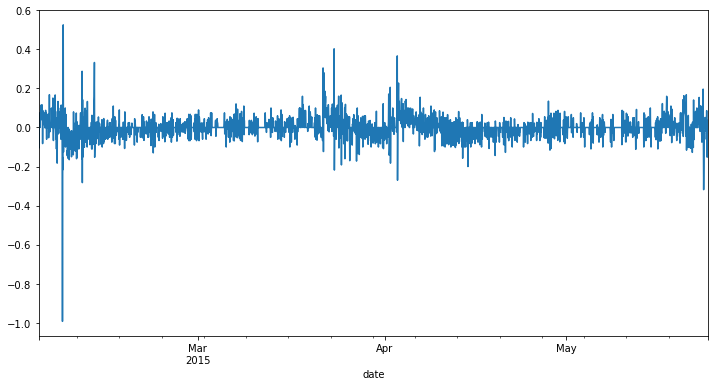

In [124]:
df['Humidity_diff'].plot()

## MA models

In [86]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(df['CO2'], order=(0, 1)).fit()
print(model.params)
#moving average is good if the data moves around mean

const        717.847003
ma.L1.CO2      0.992395
dtype: float64


In [87]:
(train, test) = df.CO2[:-10], df.CO2[-10:]

model = ARMA(df['CO2'], order=(0, 1)).fit()
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

,Prediction,True Values
0,1153.250000,909.939728
1,1152.400000,959.306888
2,1146.166667,909.471632
3,1145.400000,952.741960
4,1140.800000,909.039869
5,1150.250000,947.844587
6,1129.200000,918.713113
7,1125.800000,926.733127
8,1123.000000,915.399963
9,1124.000000,923.868232


## ARMA Models

In [91]:
model = ARMA(df['CO2'], order=(2, 1)).fit()
model.summary()
#pred = model.predict(start=len(train), end=len(train)+10)
#pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})
#arma combines past version of itself and past residuals
#ARMA(1,0) is just AR(1) and similary ARMA(0,1) is only MA(1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    CO2   No. Observations:                 2662
Model:                     ARMA(2, 1)   Log Likelihood               -8007.747
Method:                       css-mle   S.D. of innovations              4.892
Date:                Thu, 26 Nov 2020   AIC                          16025.494
Time:                        19:23:52   BIC                          16054.928
Sample:                    02-02-2015   HQIC                         16036.145
                         - 05-24-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        696.1255     85.200      8.170      0.000     529.137     863.114
ar.L1.CO2      1.9909      0.001   3805.944      0.000       1.990       1.992
ar.L2.CO2     -0.9910      0.001  -1895.025      0.000      -0.992      -0.990
ma.L1.CO2     -0.9330      0.007   -136.696      0.000      -0.946      -0.920
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0045           -0.0072j            1.0045           -0.0011
AR.2            1.0045           +0.0072j            1.0045            0.0011
MA.1            1.0719           +0.0000j            1.0719            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
#stationary, if a variable is stationary then it is properties(such as mean) are stable overtime
#they dont have trend or seasonal effects

## Extra Pointer

For those who are especially interested in time series:

There is a further class of models called ARIMA models - this stands for Autoregressive Integrated Moving Average

The 'integrated' here refers to the number of times needed to difference a series in order to achieve stationarity.
So an ARMA model is equivalent to an ARIMA model of the same MA and AR orders with no differencing.

ARMA(p,q) is equivalent to ARIMA(p,0,q)


In [128]:
# Example:

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Humidity'] ,order=(1,0,5)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2663
Model:                     ARMA(1, 5)   Log Likelihood                3956.320
Method:                       css-mle   S.D. of innovations              0.055
Date:                Thu, 19 Nov 2020   AIC                          -7896.639
Time:                        12:57:52   BIC                          -7849.542
Sample:                    02-02-2015   HQIC                         -7879.596
                         - 05-24-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.6992      1.454     17.670      0.000      22.849      28.550
ar.L1.Humidity     0.9994      0.000   2114.941      0.000       0.998       1.000
ma.L1.Humidity    -0.0358      0.019     -1.837      0.066      -0.074       0.002
ma.L2.Humidity     0.0644      0.020      3.274      0.001       0.026       0.103
ma.L3.Humidity     0.0227      0.018      1.255      0.209      -0.013       0.058
ma.L4.Humidity     0.1194      0.019      6.361      0.000       0.083       0.156
ma.L5.Humidity     0.1115      0.019      5.971      0.000       0.075       0.148
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
MA.1            1.0438           -0.9159j            1.3887           -0.1146
MA.2            1.0438           +0.9159j            1.3887            0.1146
MA.3           -0.6370           -1.4362j            1.5711           -0.3164
MA.4           -0.6370           +1.4362j            1.5711            0.3164
MA.5           -1.8845           -0.0000j            1.8845           -0.5000
-----------------------------------------------------------------------------
"""

In [93]:
#time series are mostly used in financial data, stock prices, gold prices, economic variables, anything we observe over time
# the goal is mostly prediction, by looking its past